# Introduction


Banks exist to provide monetary services to people and to make profit. With that in mind, banks devote significant resources and activity to gain capital. One way banks do this is to engage in direct marketing campaigns to sell and provide services. This data set contains result of a Portuguese Bank direct marketing campaign to sell term deposits.

## Problem Statement
The first objective was to classify if the client would subscribe to term deposit or not and to determine which variables have the highest influence on term deposit purchases

Data
The Data Set is the Portuguese Bank Marketing Data Set in the University of California, Irvine (UCI) Machine Learning Repository located at the following URL: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing. The data is a result of a direct marketing campaign performed by a Portuguese banking institution to sell term deposits/certificate of deposits. The banking institution made phone calls to potential buyers from May 2008 to November 2010. Often, more than 1 contact to the same client was required to assess whether a client would place an order. The full data set, bankadditional-full.csv, was used. There are 41,188 observations and 21 Variables in the Data Set. There are 10 continuous measure variables and 10 categorical variables. The target response (y) is a binary response indicating whether the client subscribed to a term deposit or not. ‘Yes’ (numeric value 1) indicated the client subscribed to a term deposit. ‘No’ (numeric value 0) indicated the client did not subscribe to a term deposit.The variables are broken into 4 categories: Client Data, Last Contact Info, Other, and Social and Economic Variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Reading the data

data = pd.read_csv(r"C:\Users\Dell\Desktop\Praxis\DATASETS\PROJECT\BANK MARKETING\bank-additional-full.csv", sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no missing continuous values in this data set. Thus, no imputation was necessary

In [5]:
data.shape

(41188, 21)

In [6]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

# EDA and Data Cleaning


The variables are broken into 4 categories: Client Data, Last Contact Info, Other, and Social and Economic Variables. I have performed EDA on each category seperately to get a better picture

# EDA part 1

In [7]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
client_data = data.iloc[:, 0:7]
client_data.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


Analysis

Note:
1. If any Categorical variable has more than 50% unknown values or seems highly unbalanced, we can drop that variable from dataset.
2. If unknown values are less than 50% than we can replace them by Mode of respective variable by implementing following 'impute_unknowns' function

In [9]:
# Impute unknowns function
def impute_unknowns(df, column):
    col_values = df[column].values
    df[column] = np.where(col_values=='unknown', client_data[column].mode(), col_values)
    return df

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
job
admin.           25.303486
blue-collar      22.467709
entrepreneur      3.535010
housemaid         2.573565
management        7.099155
retired           4.175974
self-employed     3.450034
services          9.636302
student           2.124405
technician       16.371273
unemployed        2.461882
unknown           0.801204
dtype: float64


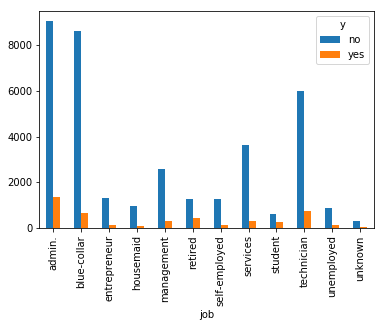

In [10]:
#Checking for unique job titles and their counts in data

print(client_data['job'].value_counts())
pd.crosstab(client_data['job'], data['y']).plot.bar()
print(client_data.groupby(['job']).size()/len(client_data)*100)

In [11]:
## As unknown is 0.801  so we will replace them by impute_function
client_data_new = impute_unknowns(df=client_data, column='job')

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
marital
divorced    11.197436
married     60.522482
single      28.085850
unknown      0.194231
dtype: float64


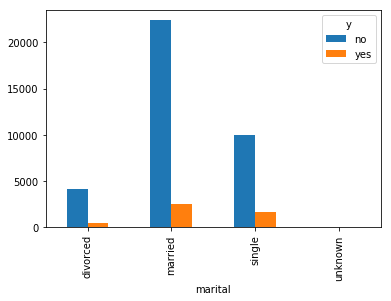

In [12]:
#Checking for counts of different marital status in data
print(client_data['marital'].value_counts())
pd.crosstab(client_data['marital'], data['y']).plot.bar()
print(client_data.groupby(['marital']).size()/len(client_data)*100)

In [13]:
## As unknown is 0.194  so we will replace them by impute_function
client_data_new = impute_unknowns(df=client_data, column='marital')

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
education
basic.4y               10.138875
basic.6y                5.564728
basic.9y               14.676605
high.school            23.101389
illiterate              0.043702
professional.course    12.729436
university.degree      29.542585
unknown                 4.202680
dtype: float64


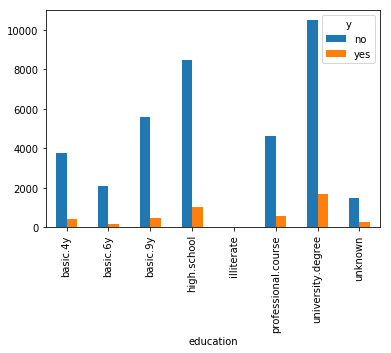

In [14]:
#Checking for Educational background unique counts
print(client_data['education'].value_counts())
pd.crosstab(client_data['education'], data['y']).plot.bar()
print(client_data.groupby(['education']).size()/len(client_data)*100)

In [15]:
## As unknown is 4.202  so we will replace them by impute_function
client_data_new = impute_unknowns(df=client_data, column='education')

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
loan
no         82.426920
unknown     2.403613
yes        15.169467
dtype: float64


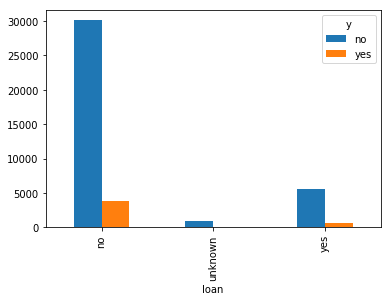

In [16]:
#Checking for loan status of clients
print(client_data['loan'].value_counts())
pd.crosstab(client_data['loan'], data['y']).plot.bar()
print(client_data.groupby(['loan']).size()/len(client_data)*100)

In [17]:
## As unknown is 15.169  so we will replace them by impute_function
client_data_new = impute_unknowns(df=client_data, column='loan')

Distribution of variables

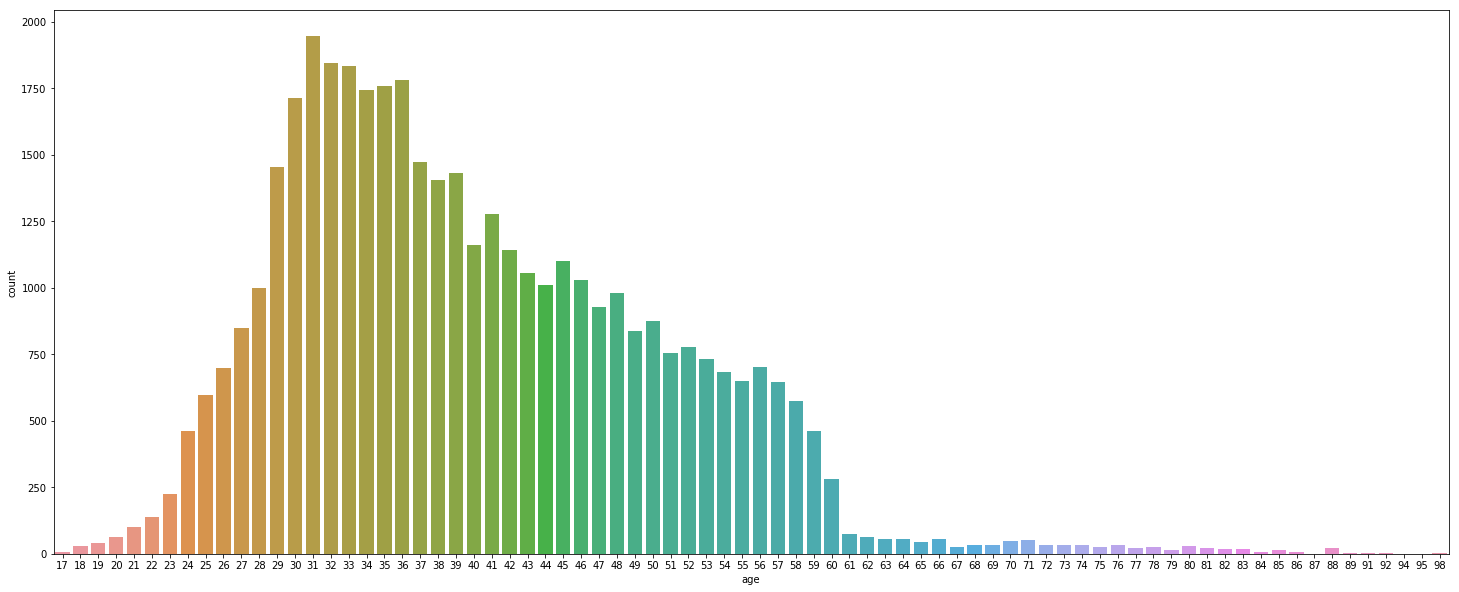

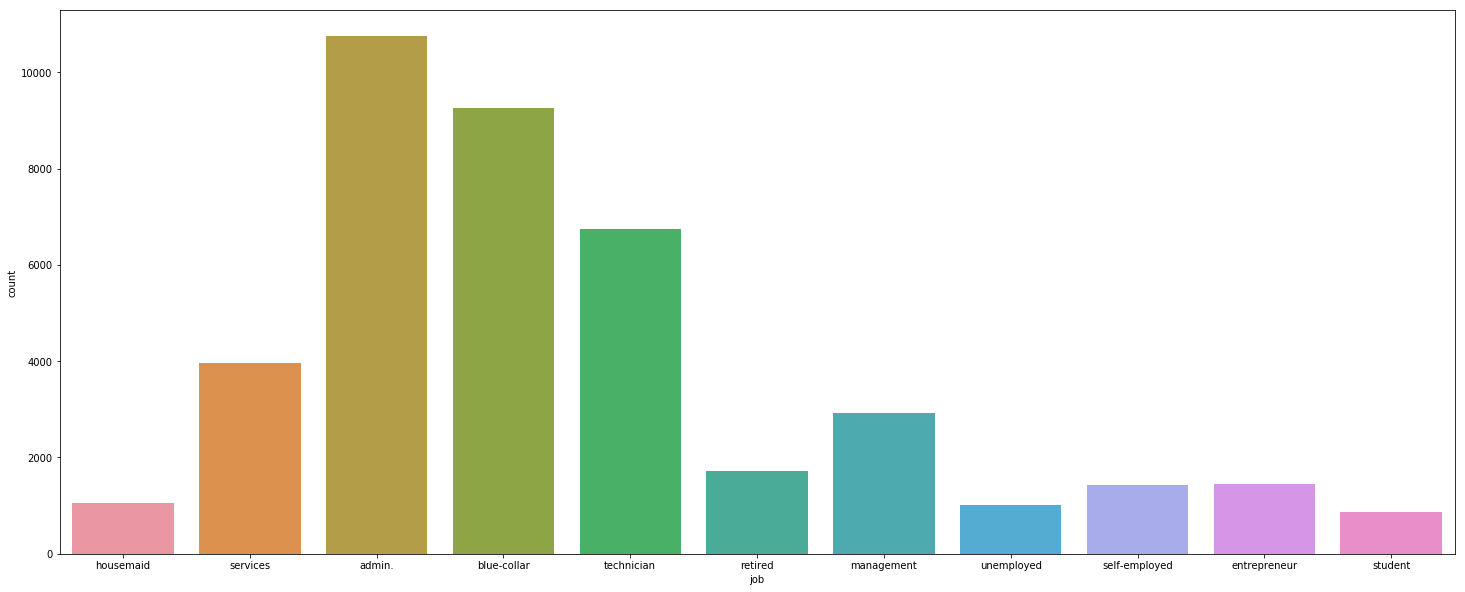

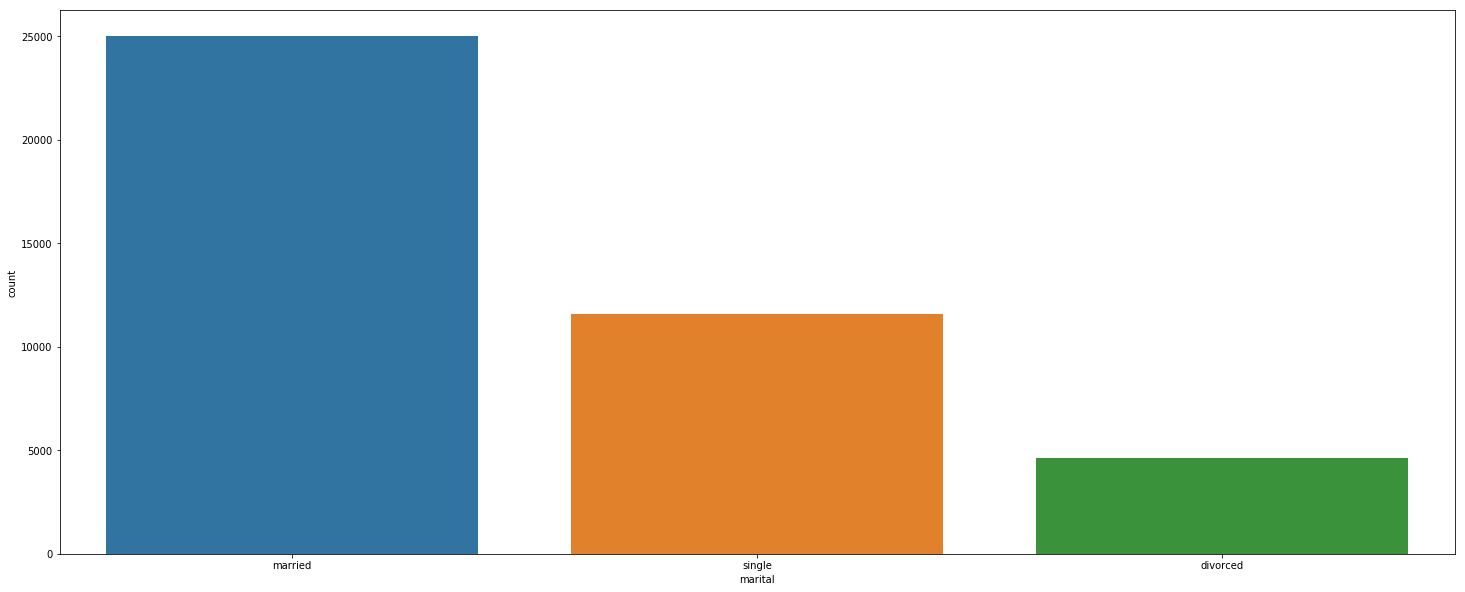

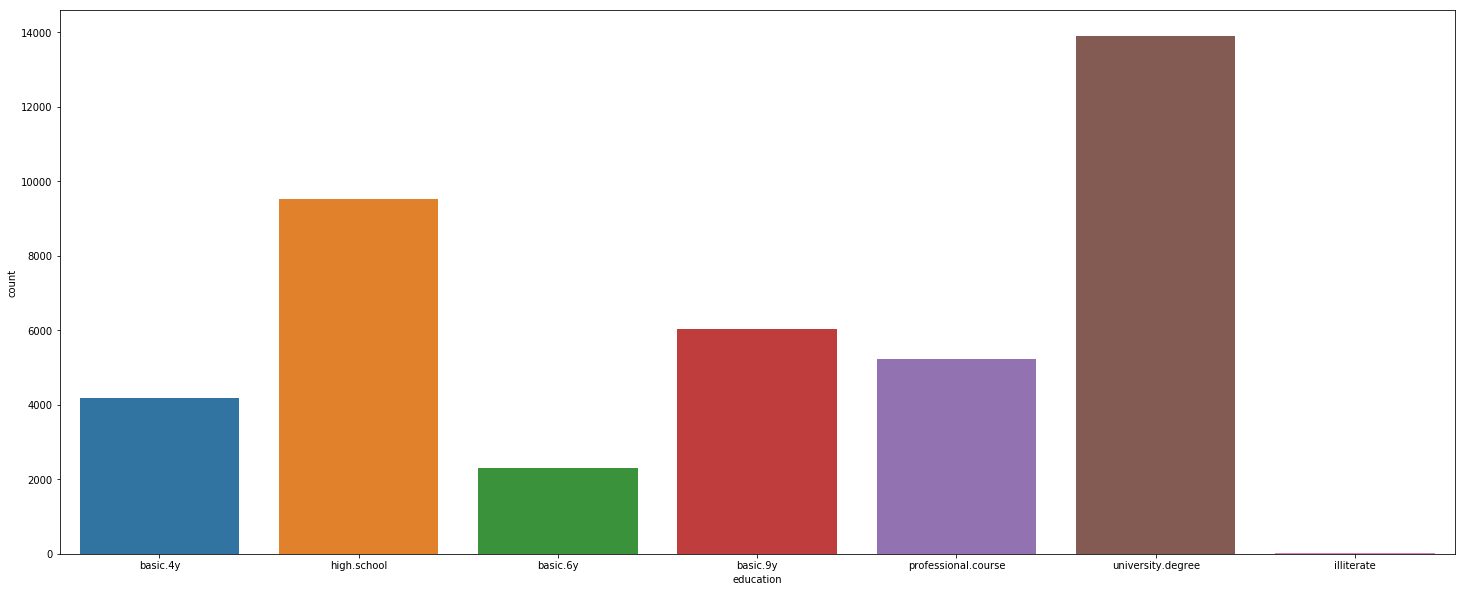

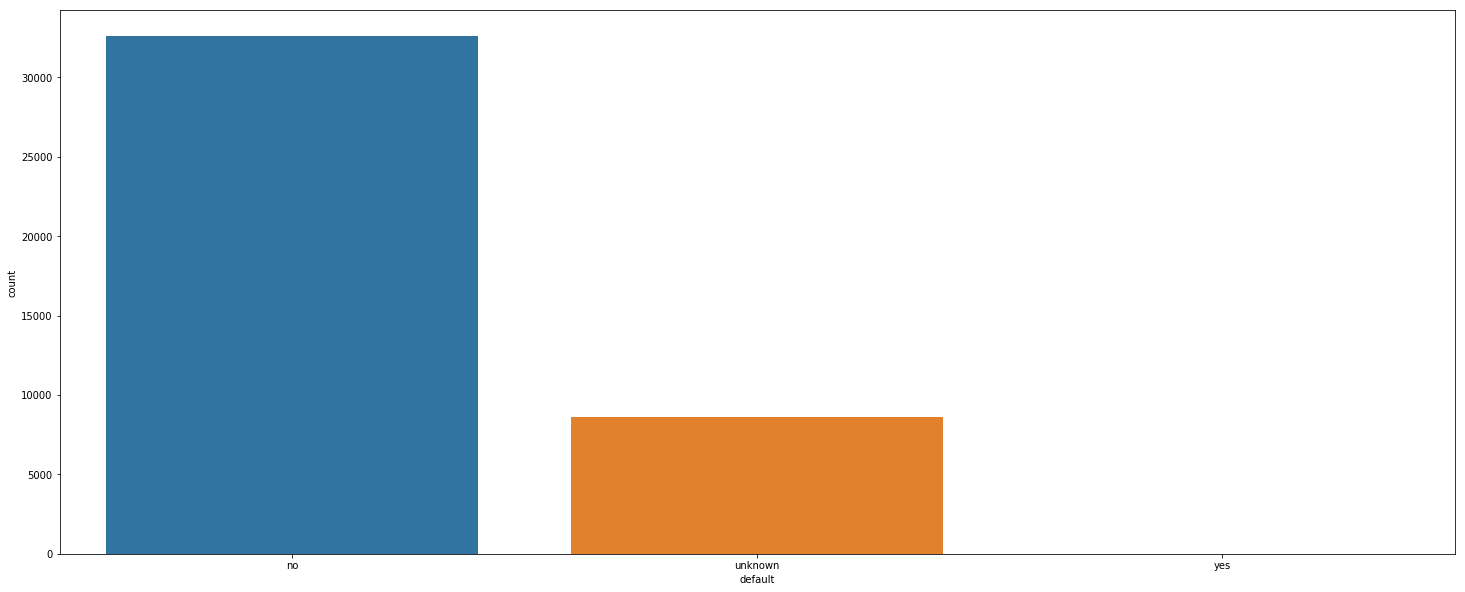

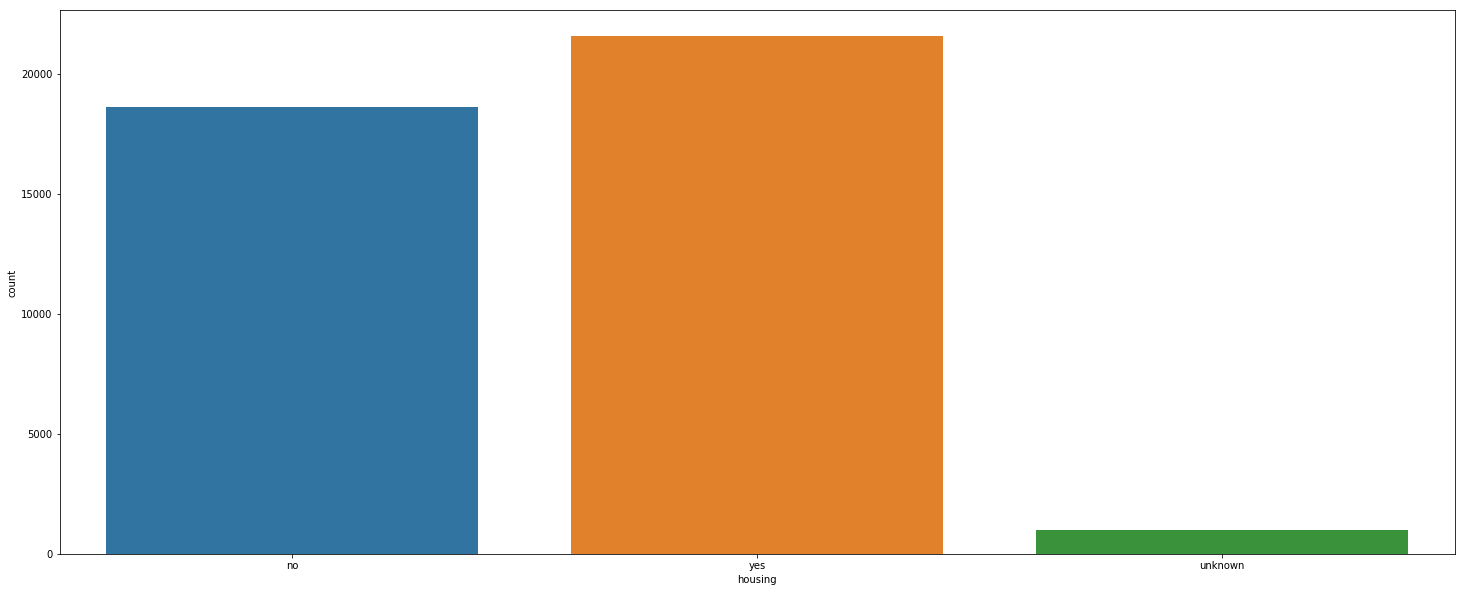

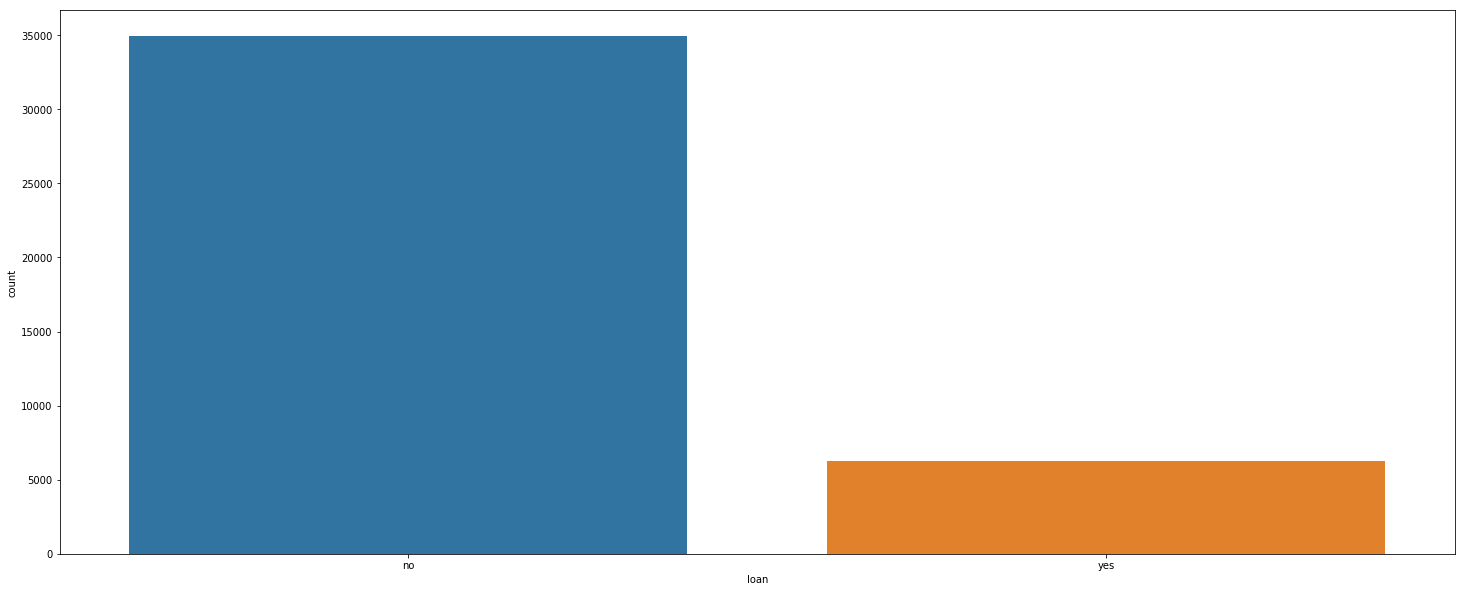

In [18]:
for i in client_data_new.columns:
    plt.figure(figsize = (25,10))
    sns.countplot(x = i, data= client_data_new);
    plt.show()

In [19]:
## Analysing Age column
client_data_new.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

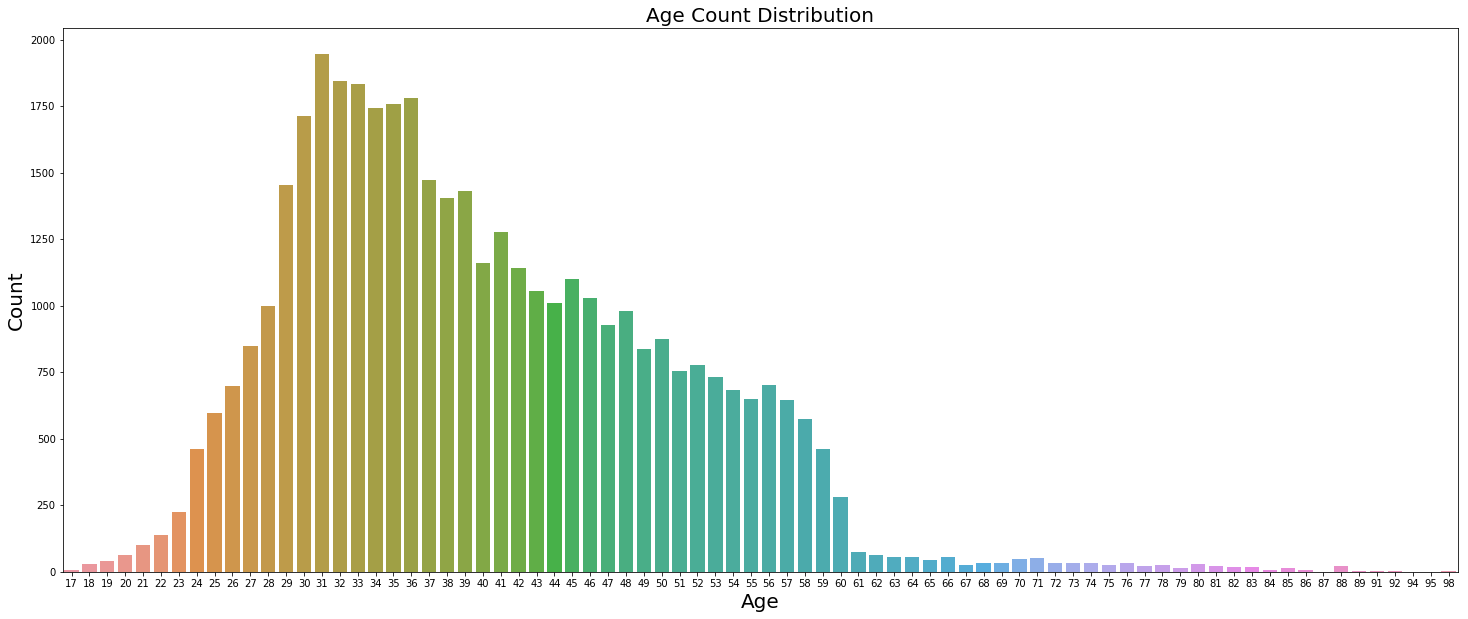

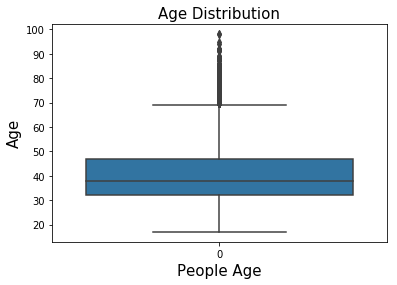

In [20]:
plt.figure(figsize = (25,10))
sns.countplot(client_data_new.age);
plt.xlabel('Age', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Age Count Distribution', fontsize=20)
plt.show()


sns.boxplot(data =  client_data_new['age'])
plt.xlabel('People Age', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.title('Age Distribution', fontsize=15)
plt.show()

In [21]:
# Outlier detection of age column
#Calculating Quartiles and detecting Outliers
Q1=client_data_new['age'].quantile(q = 0.25)
Q3=client_data_new['age'].quantile(q = 0.75)
upper=Q3+1.5*(Q3-Q1)
lower=Q1-1.5*(Q3-Q1)
upper,lower

(69.5, 9.5)

In [22]:
print('Ages above: ', upper , 'are outliers')
print('Ages below: ', lower , 'are outliers')
print('Numerber of outliers: ', client_data_new[client_data_new['age'] > 69.6]['age'].count())
print('Number of clients: ', len(client_data_new))
#Outliers in %
print('Outliers are:', round(client_data_new[client_data_new['age'] > 69.6]['age'].count()*100/len(client_data_new),2), '%')

Ages above:  69.5 are outliers
Ages below:  9.5 are outliers
Numerber of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %


# Label Encoding for Bank-Client data - Categorical Variable

In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
client_data_new['job']      = labelencoder_X.fit_transform(client_data_new['job']) 
client_data_new['marital']  = labelencoder_X.fit_transform(client_data_new['marital']) 
client_data_new['education']= labelencoder_X.fit_transform(client_data_new['education']) 
client_data_new['default']  = labelencoder_X.fit_transform(client_data_new['default']) 
client_data_new['housing']  = labelencoder_X.fit_transform(client_data_new['housing']) 
client_data_new['loan']     = labelencoder_X.fit_transform(client_data_new['loan']) 

In [24]:
client_data_new.head()

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,1,0,0
2,37,7,1,3,0,2,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,0,1


# Feature Engineering

Performed for Age Column

In [25]:
client_data_new['age'].nunique()

78

In [26]:
#function to create group of ages, this helps because we have 78 different values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

In [27]:
age(client_data_new)

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,1
5,2,7,1,2,1,0,0
6,3,0,1,5,0,0,0
7,2,1,1,6,1,0,0
8,1,9,2,5,0,2,0
9,1,7,2,3,0,2,0


In [28]:
client_data_new.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,1


In [29]:
#EDA part 2


In [30]:
# slicing 
bank_related = data.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


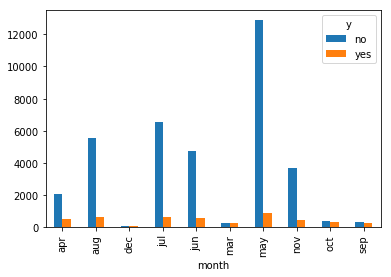

In [31]:
#Checking for loan status of clients
print(bank_related['month'].value_counts())
pd.crosstab(bank_related['month'], data['y']).plot.bar()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


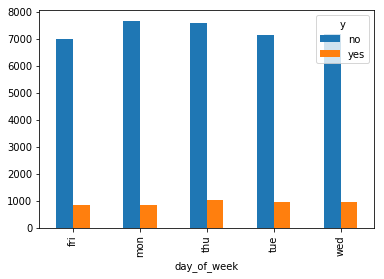

In [32]:
#Checking and plotting for calls made in which day of week
print(bank_related['day_of_week'].value_counts())
pd.crosstab(bank_related['day_of_week'], data['y']).plot.bar()

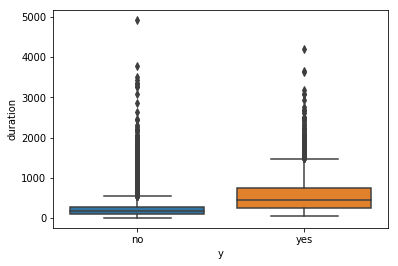

In [33]:
#Plot for call duration
sns.boxplot(x='y', y='duration', data=data)

In [34]:
#Checking for unique ways of contacting and there counts
print("Kind of Contact: \n", bank_related['contact'].unique())
c=bank_related['contact'].value_counts()
print(c)

Kind of Contact: 
 ['telephone' 'cellular']
cellular     26144
telephone    15044
Name: contact, dtype: int64


Outlier Detection

In [35]:
#Checking for Summary of duration of call
bank_related['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [36]:
#Detecting Outliers
# Quartiles
Q1=bank_related['duration'].quantile(q = 0.25)
Q3=bank_related['duration'].quantile(q = 0.75)

IQR=Q3-Q1
uw=Q3+1.5*IQR
lw=Q1-1.5*IQR
lw,uw

(-223.5, 644.5)

In [37]:
print('Duration calls above: ',uw,'are outliers')
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
#Outliers in %
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2), '%')

Duration calls above:  644.5 are outliers
Numerber of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %


Label Encoding

In [38]:
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week'])

In [39]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


In [40]:
#Binning duration column
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related)

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3
5,1,6,1,3
6,1,6,1,2
7,1,6,1,3
8,1,6,1,4
9,1,6,1,1


In [41]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


In [42]:
#EDA- Part 3

In [43]:
#Social and Economic Context Attributes
Social_Eco = data.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
Social_Eco.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [44]:
from pandas.plotting import scatter_matrix

In [45]:
Social_Eco.corr()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
emp.var.rate,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,0.906970,0.522034,0.100513,0.945154,1.000000


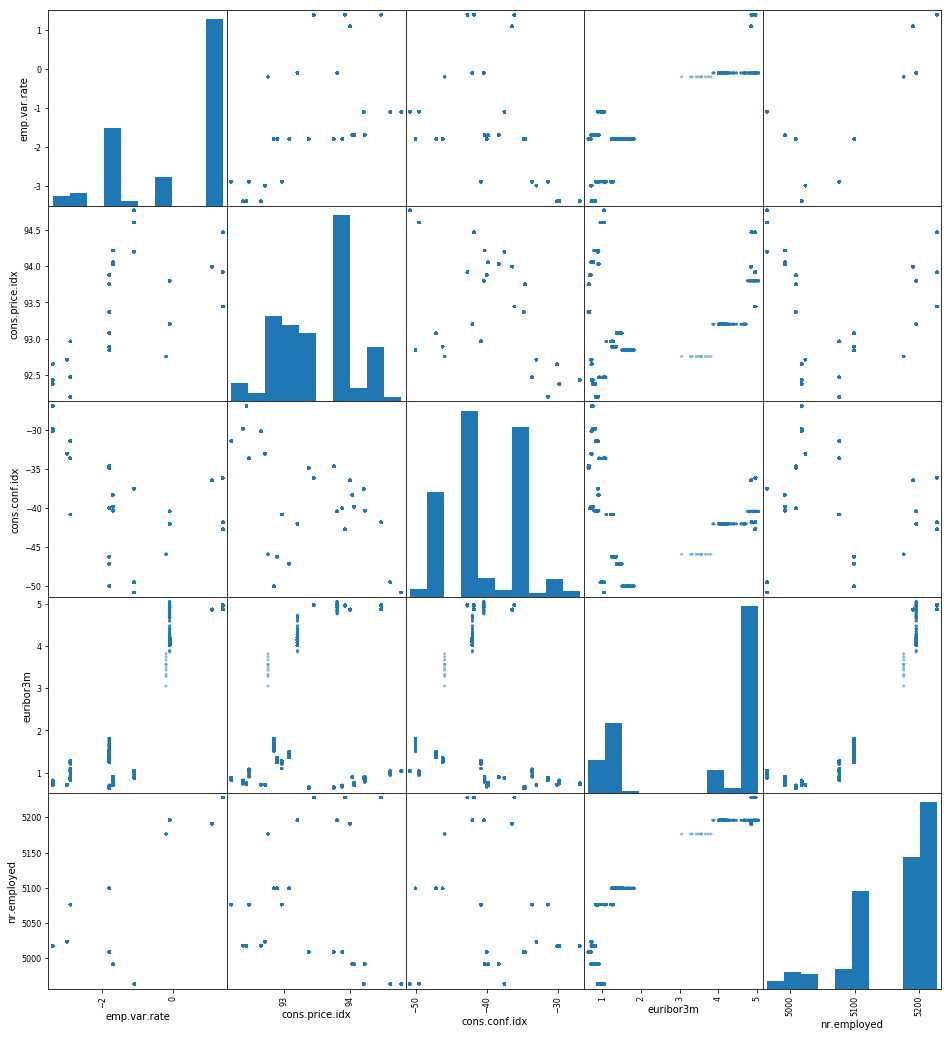

In [46]:
scatter_matrix(Social_Eco,figsize=(16,18))
plt.show()

Feature Engineering

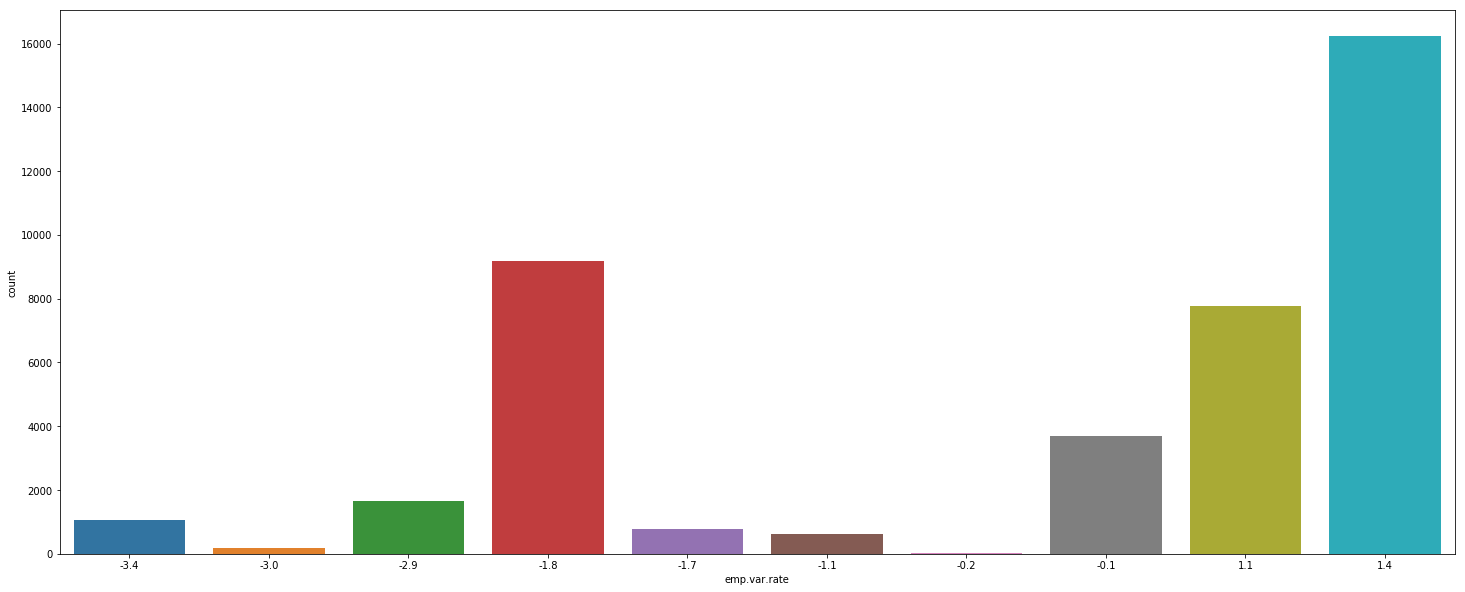

In [47]:
plt.figure(figsize = (25,10))
sns.countplot(Social_Eco["emp.var.rate"]);
plt.show()


In [48]:
#Binning emp.var.rate column
def se(data):
    data.loc[data['emp.var.rate'] > 0.1, 'emp.var.rate'] = 3
    data.loc[data['emp.var.rate'] <= -1.8, 'emp.var.rate'] = 1
    data.loc[(data['emp.var.rate'] > -1.8) & (data['emp.var.rate'] <= 0.1)  , 'emp.var.rate']    = 2
    return data
se(Social_Eco)

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3.0,93.994,-36.4,4.857,5191.0
1,3.0,93.994,-36.4,4.857,5191.0
2,3.0,93.994,-36.4,4.857,5191.0
3,3.0,93.994,-36.4,4.857,5191.0
4,3.0,93.994,-36.4,4.857,5191.0
5,3.0,93.994,-36.4,4.857,5191.0
6,3.0,93.994,-36.4,4.857,5191.0
7,3.0,93.994,-36.4,4.857,5191.0
8,3.0,93.994,-36.4,4.857,5191.0
9,3.0,93.994,-36.4,4.857,5191.0


In [49]:
Social_Eco['emp.var.rate'].value_counts()

3.0    23997
1.0    12090
2.0     5101
Name: emp.var.rate, dtype: int64

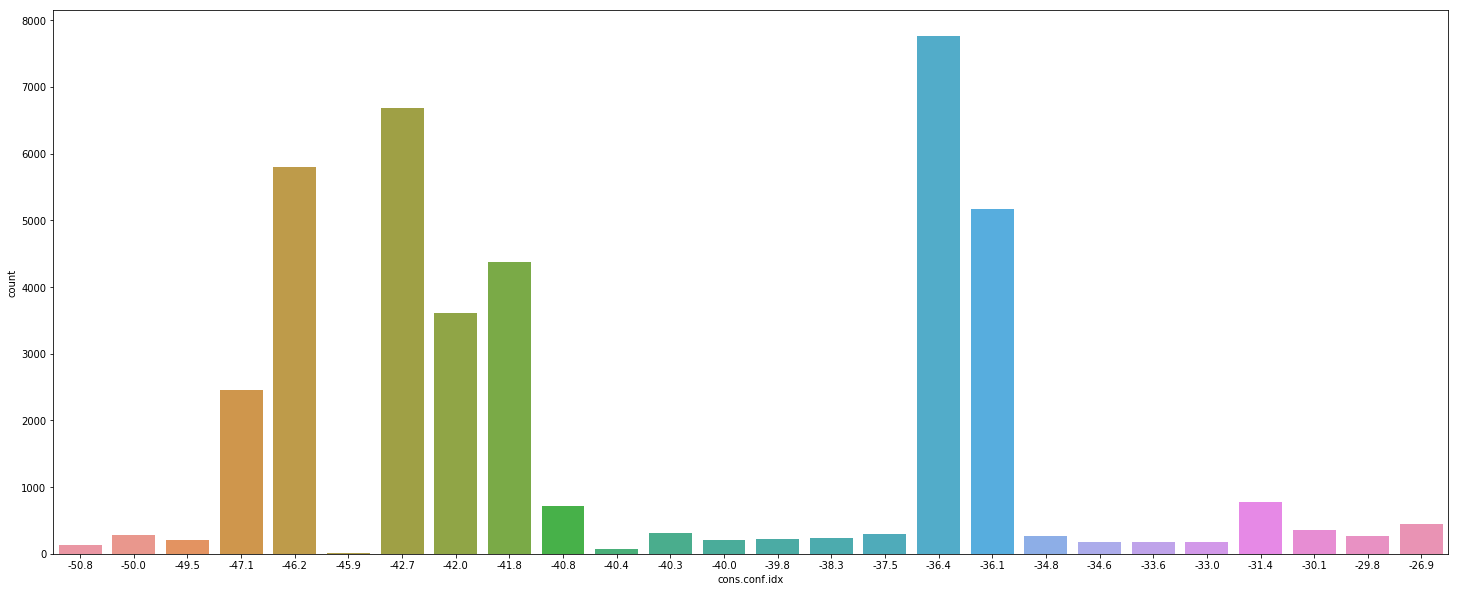

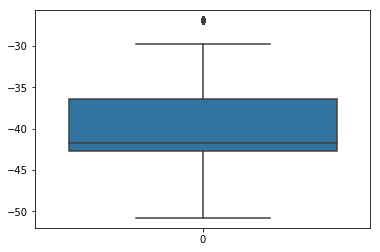

In [50]:
## now for cons.conf.idx
plt.figure(figsize = (25,10))
sns.countplot(Social_Eco["cons.conf.idx"]);
plt.show()


sns.boxplot(data =  Social_Eco['cons.conf.idx'])
plt.show()

In [51]:
#Consumer Confidence Index- Binning-Levels - {<-46.2, [-46.2,-36.4),>-36.4}
def sse(data):
    data.loc[data['cons.conf.idx'] > (-36.4), 'cons.conf.idx'] = 3
    data.loc[data['cons.conf.idx'] <= (-46.2), 'cons.conf.idx'] = 1
    data.loc[(data['cons.conf.idx'] > (-46.2)) & (data['cons.conf.idx'] <= (-36.4))  , 'cons.conf.idx']    = 2
    return(data)
sse(Social_Eco)


,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3.0,93.994,2.0,4.857,5191.0
1,3.0,93.994,2.0,4.857,5191.0
2,3.0,93.994,2.0,4.857,5191.0
3,3.0,93.994,2.0,4.857,5191.0
4,3.0,93.994,2.0,4.857,5191.0
5,3.0,93.994,2.0,4.857,5191.0
6,3.0,93.994,2.0,4.857,5191.0
7,3.0,93.994,2.0,4.857,5191.0
8,3.0,93.994,2.0,4.857,5191.0
9,3.0,93.994,2.0,4.857,5191.0


In [52]:
Social_Eco['cons.conf.idx'].value_counts()

2.0    24518
1.0     8866
3.0     7804
Name: cons.conf.idx, dtype: int64

[4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.563 3.488 3.428 3.329 3.282
 3.053 1.811 1.799 1.778 1.757 1.726 1.703 1.687 1.663 1.65  1.64  1.629
 1.614 1.602 1.584 1.574 1.56  1.556 1.548 1.538 1.531 1.52  1.51  1.498
 1.483 1.479 1.466 1.453 1.445 1.435 1.423 1.415 1.41  1.405 1.406 1.4
 1.392 1.384 1.372 1.365 1.354 1.344 1.334 1.327 1.313 1.299 1.291 1.281
 1.266 1.25  1.244 1.259 1.264 1.27  1.262 1.26  1.268 1.286 1.252 1.235
 1.224 1.215 1.206 1.099 1.085 1.072 1.059 1.048 1.044 1.029 1.018 1.007
 0.996 0.979 0.969 0.944 0.937 0.933 0.927 0.921 0.914 0.908 0.903 0.899
 0.884 0.883 0.881 0.879 0.873 0.869 0.861 0.859 0.854 0.851 0.849 0.843
 0.838 0.834 0.829 0.825 0.821 0.819 0.813 0.809 0.803 

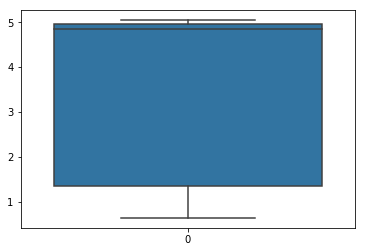

In [53]:
## now for euribor3m
print(Social_Eco['euribor3m'].unique())

sns.boxplot(data =  Social_Eco['euribor3m'])
plt.show()



In [54]:
a = Social_Eco['euribor3m'].unique()
a.sort()
print(a)

[0.634 0.635 0.636 0.637 0.638 0.639 0.64  0.642 0.643 0.644 0.645 0.646
 0.649 0.65  0.651 0.652 0.653 0.654 0.655 0.659 0.663 0.668 0.672 0.677
 0.682 0.683 0.684 0.685 0.688 0.69  0.692 0.695 0.697 0.699 0.7   0.701
 0.702 0.704 0.706 0.707 0.708 0.709 0.71  0.711 0.712 0.713 0.714 0.715
 0.716 0.717 0.718 0.719 0.72  0.721 0.722 0.723 0.724 0.727 0.728 0.729
 0.73  0.731 0.732 0.733 0.735 0.737 0.739 0.74  0.741 0.742 0.743 0.744
 0.748 0.749 0.75  0.752 0.753 0.754 0.755 0.761 0.762 0.766 0.767 0.768
 0.77  0.771 0.773 0.778 0.781 0.782 0.788 0.79  0.793 0.797 0.802 0.803
 0.809 0.81  0.813 0.819 0.821 0.822 0.825 0.827 0.829 0.834 0.835 0.838
 0.84  0.843 0.846 0.849 0.851 0.854 0.859 0.861 0.869 0.87  0.873 0.876
 0.877 0.878 0.879 0.88  0.881 0.882 0.883 0.884 0.885 0.886 0.888 0.889
 0.89  0.891 0.893 0.894 0.895 0.896 0.898 0.899 0.9   0.903 0.904 0.905
 0.908 0.914 0.921 0.927 0.933 0.937 0.942 0.944 0.953 0.956 0.959 0.965
 0.969 0.972 0.977 0.979 0.982 0.985 0.987 0.993 0.

In [55]:
#  Binning Eurointerbanking offer Rate {<1.3, (1.3,4.19), (4.19,4.96),>4.96} (after comparing with boxplot took random interval)

In [56]:
def eub(data):
    data.loc[data['euribor3m']<1.3,'euribor3m']=1
    data.loc[(data['euribor3m']<4.19)&(data['euribor3m']>=1.3),'euribor3m']=2
    data.loc[(data['euribor3m']<4.96)&(data['euribor3m']>=4.19),'euribor3m']=3
    data.loc[(data['euribor3m']>=4.96)]=4
    return(data)
eub(Social_Eco)

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3.0,93.994,2.0,3.0,5191.0
1,3.0,93.994,2.0,3.0,5191.0
2,3.0,93.994,2.0,3.0,5191.0
3,3.0,93.994,2.0,3.0,5191.0
4,3.0,93.994,2.0,3.0,5191.0
5,3.0,93.994,2.0,3.0,5191.0
6,3.0,93.994,2.0,3.0,5191.0
7,3.0,93.994,2.0,3.0,5191.0
8,3.0,93.994,2.0,3.0,5191.0
9,3.0,93.994,2.0,3.0,5191.0


In [57]:
Social_Eco['euribor3m'].value_counts()

4.0    12706
3.0    12026
1.0     8636
2.0     7820
Name: euribor3m, dtype: int64

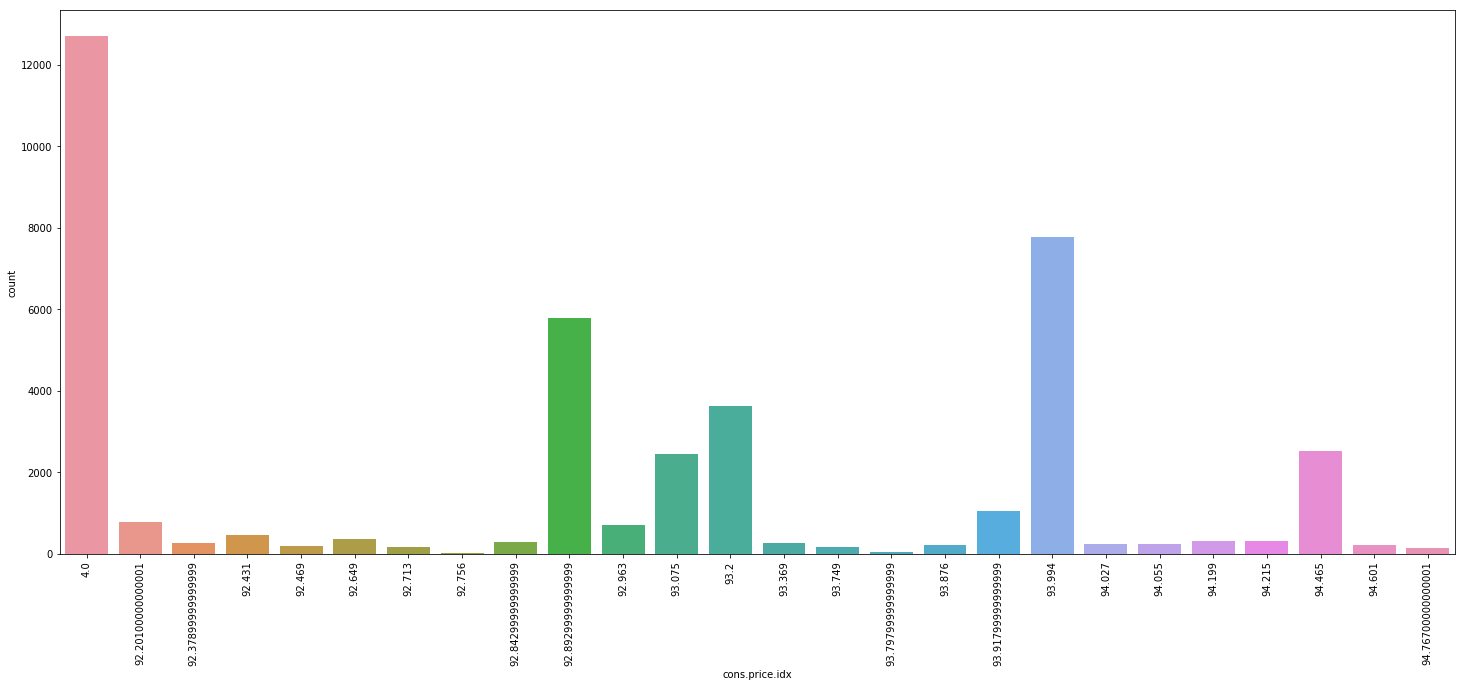

In [58]:
## now for cons.price.idx
plt.figure(figsize = (25,10))
sns.countplot(Social_Eco["cons.price.idx"]);
plt.xticks(rotation = 90)
plt.show()



In [59]:
#  Binning Consumer Price Index {<93.06, (93.06,93.91),>93.91}

In [60]:
#Binning Consumer Price Index
def cci(data):
    data.loc[data['cons.price.idx']<93.06,'cons.price.idx']=1
    data.loc[(data['cons.price.idx']>93.06)& (data['cons.price.idx']<93.91),'cons.price.idx']=2
    data.loc[(data['cons.price.idx']>93.91),'cons.price.idx']=3
    return(data)
cci(Social_Eco)

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3.0,3.0,2.0,3.0,5191.0
1,3.0,3.0,2.0,3.0,5191.0
2,3.0,3.0,2.0,3.0,5191.0
3,3.0,3.0,2.0,3.0,5191.0
4,3.0,3.0,2.0,3.0,5191.0
5,3.0,3.0,2.0,3.0,5191.0
6,3.0,3.0,2.0,3.0,5191.0
7,3.0,3.0,2.0,3.0,5191.0
8,3.0,3.0,2.0,3.0,5191.0
9,3.0,3.0,2.0,3.0,5191.0


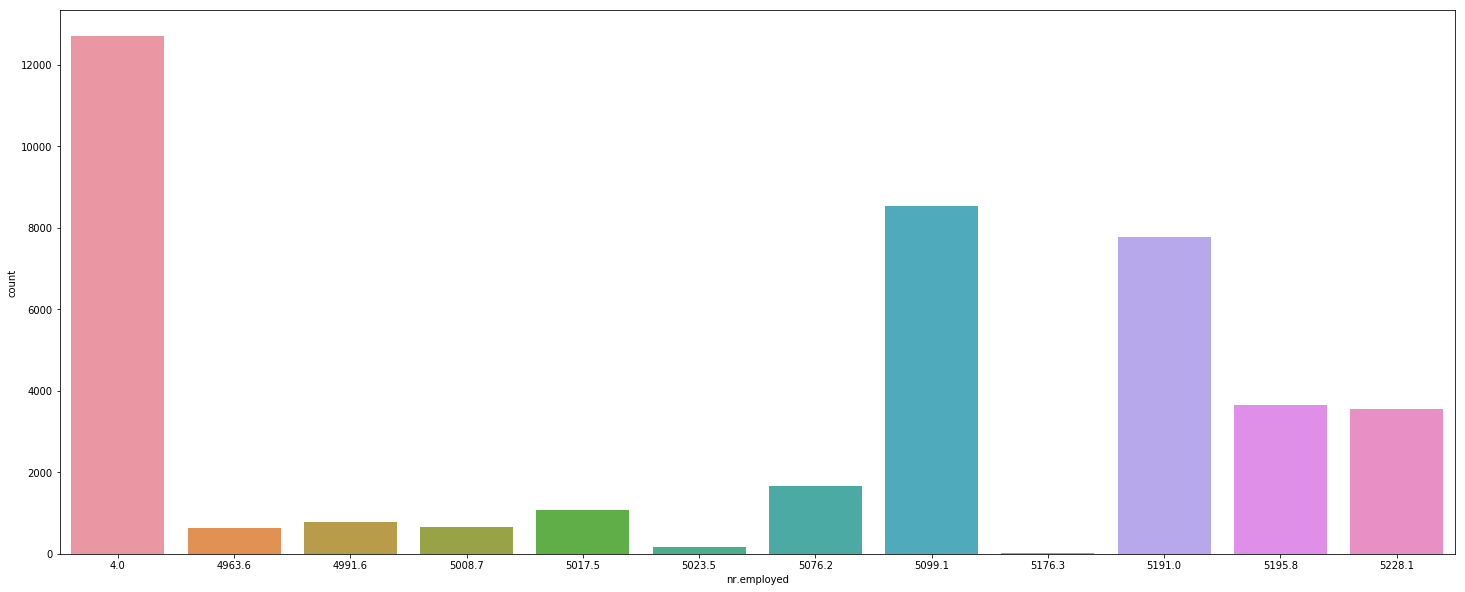

In [61]:
## now for nr.employed
plt.figure(figsize = (25,10))
sns.countplot(Social_Eco["nr.employed"]);
plt.show()

In [62]:
# Binning no of employee column {<5099.1, [5099.1,5191.02), >5191.02}

In [63]:
def ne(data):
    data.loc[data['nr.employed']<5099.1,'nr.employed']=1
    data.loc[(data['nr.employed']>=5099.1)&(data['nr.employed']<5191.02)]=2
    data.loc[data['nr.employed']>=5191.02]=3
    return (data)
ne(Social_Eco)

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,2.0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0,2.0
4,2.0,2.0,2.0,2.0,2.0
5,2.0,2.0,2.0,2.0,2.0
6,2.0,2.0,2.0,2.0,2.0
7,2.0,2.0,2.0,2.0,2.0
8,2.0,2.0,2.0,2.0,2.0
9,2.0,2.0,2.0,2.0,2.0


In [64]:
#EDA-Part 4

In [65]:
#Other Attributes
Other = data.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
Other.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [66]:
#Analysing pdays
print(Other['pdays'].nunique())

27


In [67]:
d=Other['pdays'].value_counts()
print(d)

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64


In [68]:
#pdays: number of days that passed by after the client was last contacted from 
#      a previous campaign (numeric; 999 means client was not previously contacted)
def pdays(data):
    data.loc[data['pdays']==999,'pdays_new']='never_contacted'
    data.loc[data['pdays']!=999,'pdays_new']='contacted_before'
    return (data)
pdays(Other)

,campaign,pdays,previous,poutcome,pdays_new
0,1,999,0,nonexistent,never_contacted
1,1,999,0,nonexistent,never_contacted
2,1,999,0,nonexistent,never_contacted
3,1,999,0,nonexistent,never_contacted
4,1,999,0,nonexistent,never_contacted
5,1,999,0,nonexistent,never_contacted
6,1,999,0,nonexistent,never_contacted
7,1,999,0,nonexistent,never_contacted
8,1,999,0,nonexistent,never_contacted
9,1,999,0,nonexistent,never_contacted


In [69]:
Other['pdays_new'].value_counts()

never_contacted     39673
contacted_before     1515
Name: pdays_new, dtype: int64

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


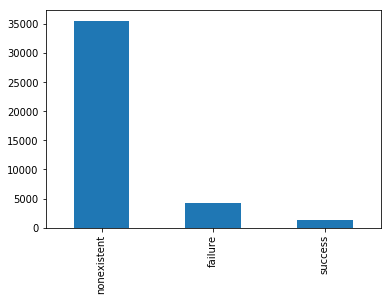

In [70]:
#Analysing outcomes of campaign
p=Other['poutcome'].value_counts()
print(p)
p.plot.bar()

In [71]:
#LAbel Encoding for poutcome and pdays_new

Other['poutcome']=labelencoder_X.fit_transform(Other['poutcome'])
Other['pdays_new']=labelencoder_X.fit_transform(Other['pdays_new'])

In [72]:
Other.head()

,campaign,pdays,previous,poutcome,pdays_new
0,1,999,0,1,1
1,1,999,0,1,1
2,1,999,0,1,1
3,1,999,0,1,1
4,1,999,0,1,1


In [73]:
Other.drop(['pdays'],axis=1,inplace=True)

In [74]:
Other.head()

,campaign,previous,poutcome,pdays_new
0,1,0,1,1
1,1,0,1,1
2,1,0,1,1
3,1,0,1,1
4,1,0,1,1


In [75]:
#Data Modeling
bank_final= pd.concat([client_data_new , bank_related, Social_Eco, Other], axis = 1)
bank_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,previous,poutcome,pdays_new
0,3,3,1,0,0,0,0,1,6,1,3,2.0,2.0,2.0,2.0,2.0,1,0,1,1
1,3,7,1,3,1,0,0,1,6,1,2,2.0,2.0,2.0,2.0,2.0,1,0,1,1
2,2,7,1,3,0,2,0,1,6,1,3,2.0,2.0,2.0,2.0,2.0,1,0,1,1
3,2,0,1,1,0,0,0,1,6,1,2,2.0,2.0,2.0,2.0,2.0,1,0,1,1
4,3,7,1,3,0,0,1,1,6,1,3,2.0,2.0,2.0,2.0,2.0,1,0,1,1


In [76]:
bank_final.shape

(41188, 20)

In [77]:
bank_final.dtypes

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
campaign            int64
previous            int64
poutcome            int32
pdays_new           int32
dtype: object

In [78]:
#Converting Y-Response variable in binary
lbs=LabelEncoder()
data['y']=lbs.fit_transform(data['y'])

In [79]:
import statsmodels.api as sm
logit_model=sm.Logit(data['y'],bank_final[['age','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','campaign']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.297780
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.154     
Dependent Variable: y                AIC:              24543.9129
Date:               2019-11-02 03:29 BIC:              24604.2943
No. Observations:   41188            Log-Likelihood:   -12265.   
Df Model:           6                LL-Null:          -14499.   
Df Residuals:       41181            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age              -0.0750   0.0207  -3.6328 0.0003 -0.1155 -0.0345
emp.var.rate     -0.7320   0.1763  -4.1512 0.0000 -1.0777 -0.3864


In [80]:
#Train Test Split
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score,make_scorer
from sklearn.model_selection import cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(bank_final, data.y, test_size = 0.2, random_state = 101)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [81]:
!pip install xgboost

In [82]:
#importing necessary packages

from sklearn.preprocessing import scale
from sklearn.preprocessing import Imputer
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,BaggingRegressor,AdaBoostRegressor

In [83]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,previous,poutcome,pdays_new
39577,4,5,1,2,0,0,0,0,6,3,2,1.0,2.0,2.0,1.0,1.0,1,2,0,1
10104,3,9,1,6,0,2,0,1,4,2,4,3.0,3.0,3.0,3.0,3.0,1,0,1,1
17235,2,7,1,3,0,0,0,0,3,0,4,4.0,1.0,4.0,4.0,1.0,4,0,1,1
20926,1,0,2,6,0,2,0,0,1,2,4,4.0,1.0,4.0,4.0,1.0,1,0,1,1
17626,3,2,1,2,0,2,0,0,3,1,2,4.0,1.0,4.0,4.0,1.0,5,0,1,1


In [84]:
#Digging deeper into our y_train to check how much no's and y's are there
y_train.value_counts()

0    29269
1     3681
Name: y, dtype: int64

In [85]:
#calculating the proportion of 0 and 1 in the target column
count_no_sub=len(data[data['y']==0])
count_sub=len(data[data['y']==1])
pct_no_sub=count_no_sub/(count_no_sub+count_sub)
print("Percentage of people who have not subscribed is: ",pct_no_sub * 100)
pct_sub= count_sub/(count_no_sub+count_sub)
print("Percentage of people who have subscribed is: ",pct_sub * 100)

Percentage of people who have not subscribed is:  88.73458288821988
Percentage of people who have subscribed is:  11.265417111780131


In [86]:
##Classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11.

In [87]:
#For SMOTE
!pip install imblearn


Handling the imbalanced data set . Applying the SMOTE technique
** Note : Apply SMOTE only on train data,because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

In [88]:
x = data.loc[:,data.columns !='y']
y = data.loc[:,data.columns =='y']
print("Number of subscription before applying SMOTE: ",len((y[y['y']==1])))

Number of subscription before applying SMOTE:  4640


In [89]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data

print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  58538
Number of no subscription in oversampled data 29269
Number of subscription 29269
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [213]:
X_train=os_data_X
y_train=os_data_y

In [214]:
#importing necessary packages

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,BaggingRegressor,AdaBoostRegressor

In [215]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('Xgboost',  XGBClassifier()))
#models.append(('Adaboost', AdaBoostClassifier()))


In [216]:
# evaluate each model in turn
seed =7
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.842855 (0.023090)
CART: 0.933498 (0.050522)
Random Forest: 0.949863 (0.040253)
K-NN: 0.910950 (0.073229)
NB: 0.747938 (0.088020)
Xgboost: 0.937461 (0.039475)
Adaboost: 0.925144 (0.028207)


In [217]:
#Confusion matrix for Logistic Regression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)
print(confusion_matrix(y_test, logpred))

#Confusion matrix for Decision tree classifier
tree=DecisionTreeClassifier() 
tree.fit(X_train,y_train)
treepred=tree.predict(X_test)
print(confusion_matrix(y_test, treepred))
                    
#Confusion matrix for Random Forest Classifier
rfc = RandomForestClassifier(n_estimators = 200) #criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)                      
print(confusion_matrix(y_test, rfcpred ))
    
#Confusion matrix for KNN
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)                     
knpred=kn.predict(X_test)   
print(confusion_matrix(y_test, knpred))

#Confusion matrix for Naive Bayes
Nb = GaussianNB()
Nb.fit(X_train,y_train)
Nbpred= Nb.predict(X_test)
print(confusion_matrix(y_test, Nbpred))

#Confusion matrix for XgBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbpred = xgb.predict(X_test)
print(confusion_matrix(y_test, xgbpred ))

#Confusion matrix for AdaBoost Classifier
adb=AdaBoostClassifier()
adb.fit(X_train, y_train)
adbprd = adb.predict(X_test)
print(confusion_matrix(y_test, adbprd ))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Logistic Regression: 
 [[6062 1217]
 [ 154  805]]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Decision Tree Classifier: 
 [[6750  529]
 [ 507  452]]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Random Forest Classifier: 
 [[6935  344]
 [ 454  505]]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighbors Classifier: 
 [[6081 1198]
 [ 255  704]]


GaussianNB(priors=None, var_smoothing=1e-09)

Naive Bayes: 
 [[6322  957]
 [ 395  564]]


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

XgBoost Classifier: 
 [[6741  538]
 [ 301  658]]


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

AdaBoost Classifier: 
 [[6760  519]
 [ 340  619]]


In [235]:
#Cross Validation scores for each algorithms

LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("The cross validation for Logistic Regression is: ",LOGCV)

RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy')).mean()
print("The cross validation for Random Forest Classifier is: ",RFCCV)

KNNCV = (cross_val_score(kn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("The cross validation for KNeighbors Classifier is: ",KNNCV)

NBCV = (cross_val_score(Nb ,X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("The cross validation for Naive Bayes Classifier is: ",NBCV)

XHBCV = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10,scoring='accuracy').mean())
print("The cross validation for XgBoost Classifier is: ",XHBCV)

ADBCV = (cross_val_score(estimator = adb, X = X_train, y = y_train, cv = 10,scoring='accuracy').mean())
print("The cross validation for AdaBoost Classifier is: ",ADBCV)


The cross validation for Logistic Regression is:  0.8610474534067807
The cross validation for Random Forest Classifier is:  0.9534320087094527
The cross validation for KNeighbors Classifier is:  0.915832343503409
The cross validation for Naive Bayes Classifier is:  0.7555947936609557
The cross validation for XgBoost Classifier is:  0.9345902667810316
The cross validation for AdaBoost Classifier is:  0.9251945786757793


In [238]:
print('Logistic Regression Reports\n',classification_report(y_test, logpred))
print("Random Forest Reports: \n",classification_report(y_test, rfcpred))
print("KNeighbors Reports: \n", classification_report(y_test, knpred))
print("Naive Bayes reports: \n" ,classification_report(y_test, Nbpred))
print("XgBoost Reports:\n ",classification_report(y_test, xgbpred))
print('AdaBoost Reports\n',classification_report(y_test, adbprd ))

Logistic Regression Reports
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      7279
           1       0.40      0.84      0.54       959

    accuracy                           0.83      8238
   macro avg       0.69      0.84      0.72      8238
weighted avg       0.91      0.83      0.86      8238

Random Forest Reports: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      7279
           1       0.59      0.53      0.56       959

    accuracy                           0.90      8238
   macro avg       0.77      0.74      0.75      8238
weighted avg       0.90      0.90      0.90      8238

KNeighbors Reports: 
               precision    recall  f1-score   support

           0       0.96      0.84      0.89      7279
           1       0.37      0.73      0.49       959

    accuracy                           0.82      8238
   macro avg       0.66      0.78      0.69      823

In [250]:
#Roc curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Text(0.5, 1.0, 'Receiver Operating Characteristic Logistic ')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic Bagging-Tree ')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic Random Forest ')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

Text(0.5, 1.0, 'Reciever Operating Characterstic XGBoost')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

Text(0.5, 1.0, 'Reciever Operating Characterstic AdaBoost')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Comparison ')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

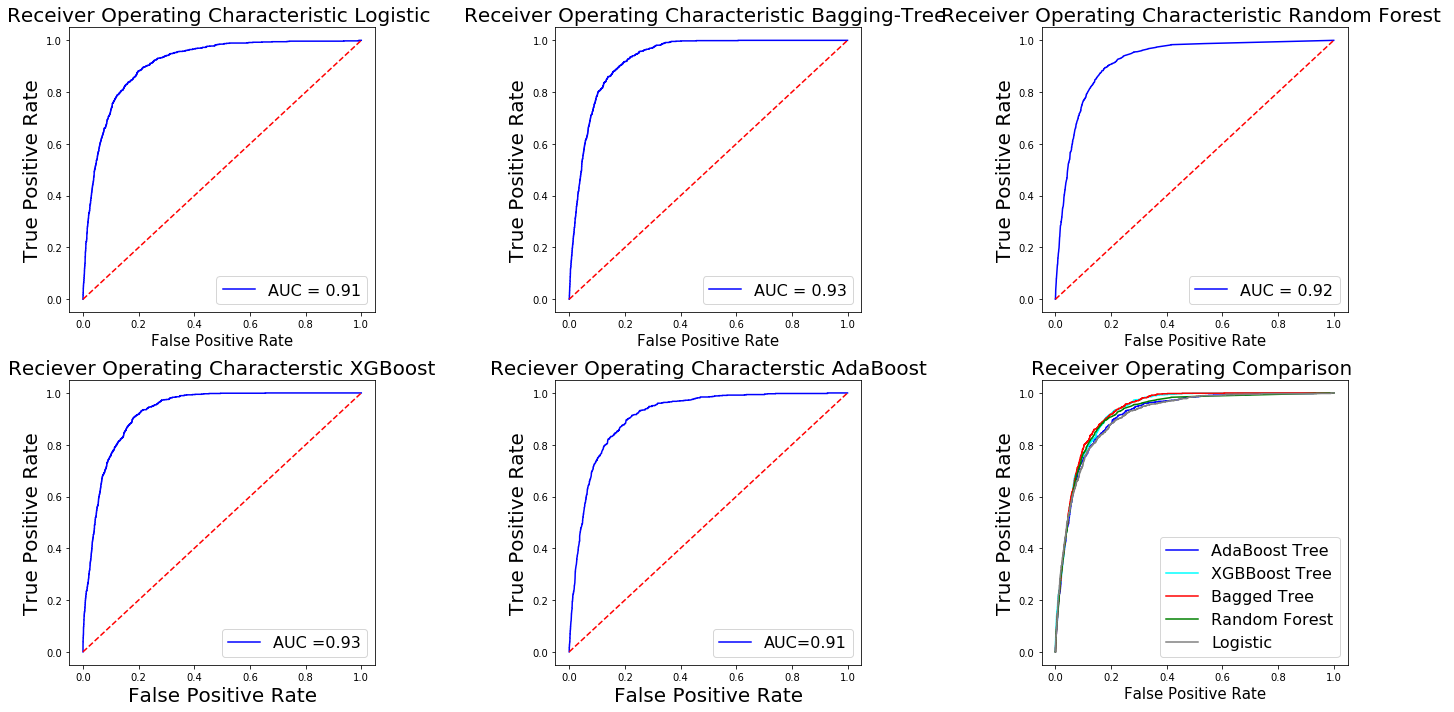

In [246]:
from sklearn import metrics
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})


#Bagging Model
probs = best_bag_tree.predict_proba(X_test)
preds = probs[:,1]
fprbg, tprbg, thresholdbg = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprbg, tprbg)

ax_arr[0,1].plot(fprbg, tprbg, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Bagging-Tree ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})



#RANDOM FOREST 
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,2].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#XGBoost
probs=xgb.predict_proba(X_test)
preds=probs[:,1]
fprxgb,tprxgb,thresholdxgb=metrics.roc_curve(y_test,preds)
roc_aucxgb=metrics.auc(fprxgb,tprxgb)

ax_arr[1,0].plot(fprxgb,tprxgb,'b',label='AUC =%0.2f' % roc_aucxgb)
ax_arr[1,0].plot([0,1],[0,1],'r--')
ax_arr[1,0].set_title("Reciever Operating Characterstic XGBoost", fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel("False Positive Rate", fontsize=20)
ax_arr[1,0].legend(loc="lower right",prop={'size' :16})


#Adaptive Boosting
probs=adb.predict_proba(X_test)
preds=probs[:,1]
fpradb,tpradb,thresholdadb=metrics.roc_curve(y_test,preds)
roc_aucadb=metrics.auc(fpradb,tpradb)

ax_arr[1,1].plot(fpradb,tpradb,'b',label='AUC=%0.2f' % roc_aucadb)
ax_arr[1,1].plot([0,1],[0,1],'r--')
ax_arr[1,1].set_title('Reciever Operating Characterstic AdaBoost',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=20)
ax_arr[1,1].legend(loc='lower right',prop={'size':16})


#Combining All 
ax_arr[1,2].plot(fpradb,tpradb,'b',label="AdaBoost Tree",color='blue')
ax_arr[1,2].plot(fprxgb,tprxgb,'b',label="XGBBoost Tree",color='cyan')
ax_arr[1,2].plot(fprbg,tprbg,'b',label="Bagged Tree",color='red')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

In [96]:
#Trying Bagging 
param_tree={'criterion':['gini','entropy'],'max_depth':[3,5,7,9,11,13]}
best_tree=GridSearchCV(estimator=tree,param_grid=param_tree,scoring='accuracy',n_jobs=-1,cv=5)
best_tree.fit(X_train,y_train)
BesttreeCV = (cross_val_score(best_tree.best_estimator_, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(BesttreeCV)
bag=BaggingClassifier(base_estimator=best_tree.best_estimator_)
bagging_param={'n_estimators':[20,50,100,200]}
best_bag_tree=GridSearchCV(estimator=bag,param_grid=bagging_param,scoring='accuracy',cv=5,n_jobs=-1)
best_bag_tree.fit(X_train,y_train)
bagpred=best_bag_tree.predict(X_test)

print(confusion_matrix(y_test, bagpred))
print(round(accuracy_score(y_test, bagpred),2)*100)
BagtreeCV = (cross_val_score(best_bag_tree.best_estimator_, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(BagtreeCV)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13]},
             pre_d

0.9298575549662786


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=13,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               min_samples_split=2,
                                                     

[[6784  495]
 [ 331  628]]
90.0
0.9429601859847085


<Figure size 1440x1800 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 20 artists>

([<matplotlib.axis.YTick at 0x1a00127f400>,
 <a list of 20 Text yticklabel objects>)

Text(0.5, 0, 'Relative Importance')

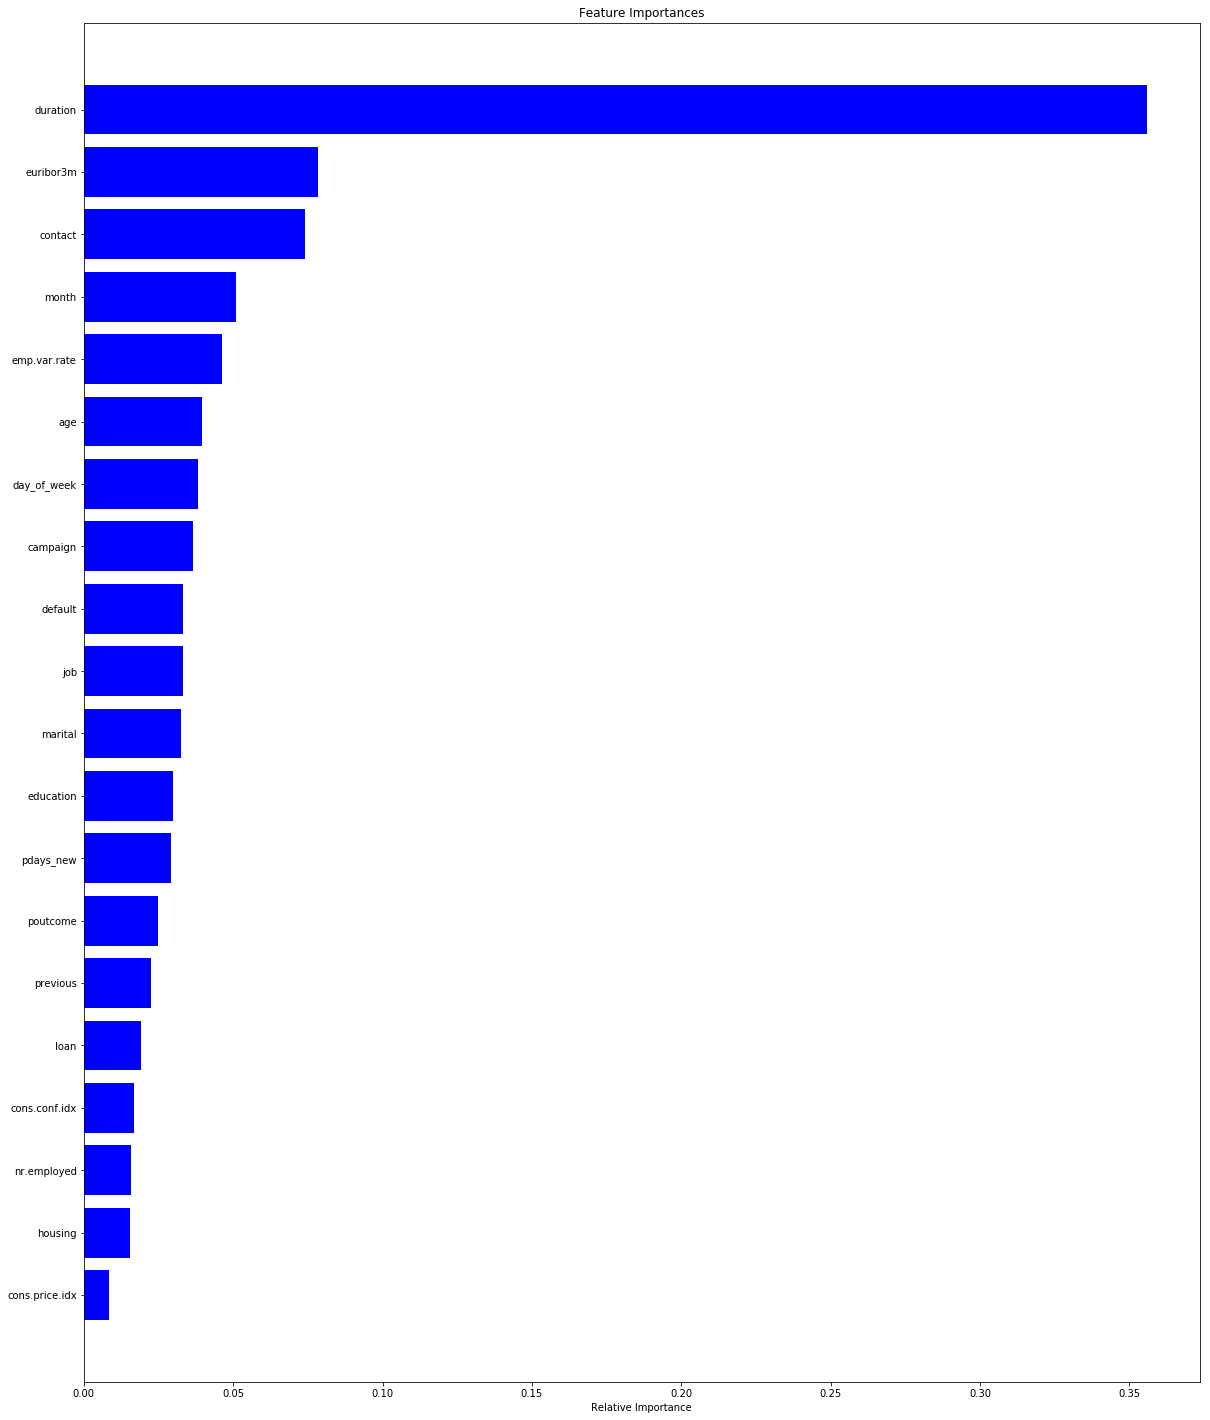

In [245]:
features=X_train.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(1,figsize=(20,25))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

As we can see from the diagram showing feature importances, the most important features are:

Customer's account balance,
Customer's age,
Number of contacts performed during this campaign and contact duration,
Number of contacts performed before this campaign.


# So the main outcomes of the modelling are:

Customers of greater age are more likely to subscribe for the term deposit.

Customers with greater account balance are more likely to subscribe for the term deposit.

Number of contacts with the customers really matters. Too many contacts with the customer could make him decline the offer.